<a href="https://colab.research.google.com/github/antonysama/Projects_w._time_series/blob/master/DUCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("readxl")  # Install the 'readxl' package
library(readxl)  # Load the 'readxl' package


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- read_excel("AER.xlsx", range = "A1:j174")

In [ ]:
head(data)  # View the first few rows of the data

Drill_Year,Drill_month,Drilled well,Drilled well and Completed,Crude_bitumen_well_count,Oil_well_count,Gas_well_count,Other_well_count,Connected,Not Connected
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,1,1660,460,23,10,262,165,295,165
2009,2,1600,1079,43,20,754,262,817,262
2009,3,490,437,37,18,169,213,224,213
2009,4,113,90,35,3,18,34,56,34
2009,5,137,130,40,6,29,55,75,55
2009,6,337,238,24,10,80,124,114,124


In [ ]:
# Combine first and second columns and create a date column
data$date <- as.Date(paste(data$Drill_Year, data$Drill_month, "01", sep = "-"), format = "%Y-%m-%d")

# View the updated data
head(data)


Drill_Year,Drill_month,Drilled well,Drilled well and Completed,Crude_bitumen_well_count,Oil_well_count,Gas_well_count,Other_well_count,Connected,Not Connected,date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2009,1,1660,460,23,10,262,165,295,165,2009-01-01
2009,2,1600,1079,43,20,754,262,817,262,2009-02-01
2009,3,490,437,37,18,169,213,224,213,2009-03-01
2009,4,113,90,35,3,18,34,56,34,2009-04-01
2009,5,137,130,40,6,29,55,75,55,2009-05-01
2009,6,337,238,24,10,80,124,114,124,2009-06-01


In [ ]:
# Create the DUC% field
data$DUC_percent <- 100 - (data$`Drilled well and Completed` / data$`Drilled well`) * 100

# View the updated data
head(data)


Drill_Year,Drill_month,Drilled well,Drilled well and Completed,Crude_bitumen_well_count,Oil_well_count,Gas_well_count,Other_well_count,Connected,Not Connected,date,DUC_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
2009,1,1660,460,23,10,262,165,295,165,2009-01-01,72.289157
2009,2,1600,1079,43,20,754,262,817,262,2009-02-01,32.562500
2009,3,490,437,37,18,169,213,224,213,2009-03-01,10.816327
2009,4,113,90,35,3,18,34,56,34,2009-04-01,20.353982
2009,5,137,130,40,6,29,55,75,55,2009-05-01,5.109489
2009,6,337,238,24,10,80,124,114,124,2009-06-01,29.376855


In [ ]:
install.packages("forecast", repos = "https://cran.rstudio.com/") # faster as it downloads from a close by location


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




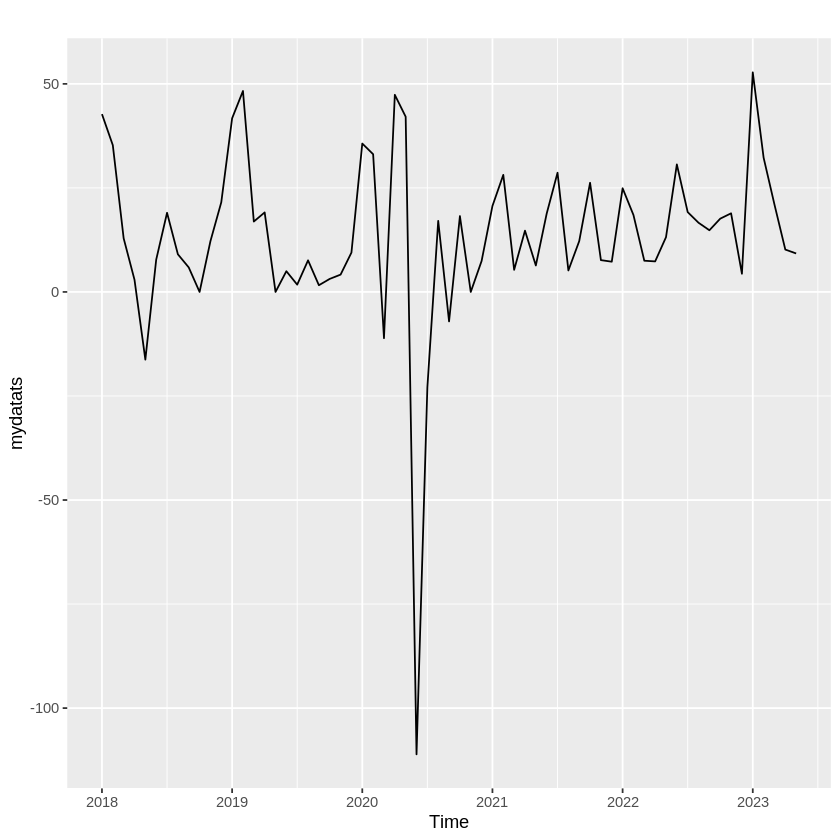

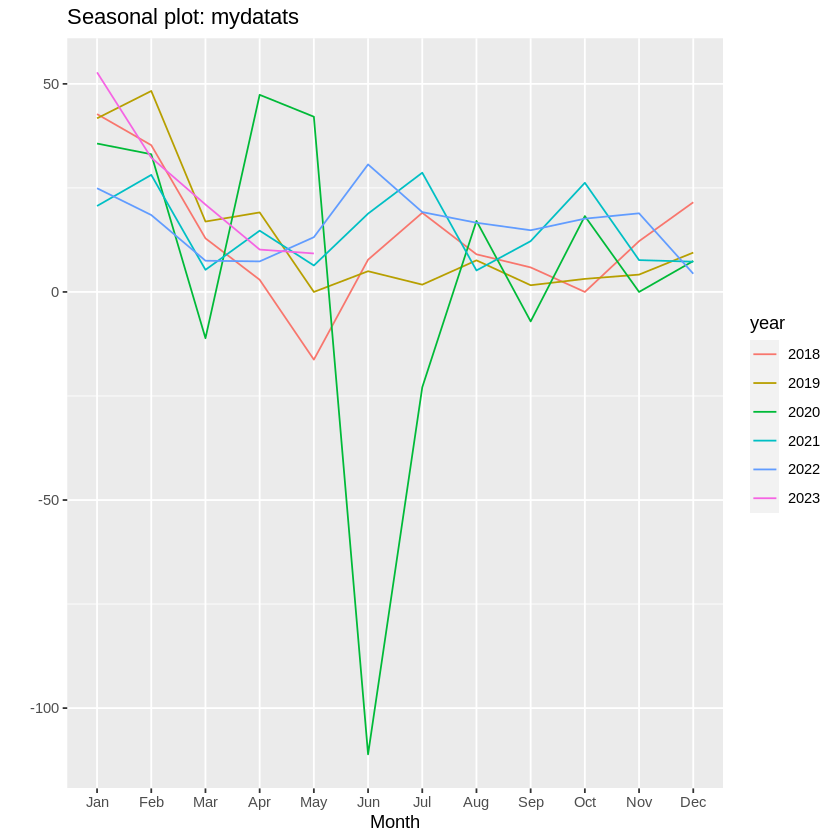

In [ ]:
# Creating a time series and plotting seasonality

# Convert the 'date' column to a Date format (if not already done)
data$date <- as.Date(data$date)

# Create a subset for data after 2015
subset_data <- subset(data, Drill_Year > 2017)

# Create a time series object
mydatats <- ts(subset_data$DUC_percent, start = c(2018, 1), frequency = 12)  # Assuming monthly data

# Plot the time series
autoplot(mydatats)

# Plot the seasonality
ggseasonplot(mydatats)
